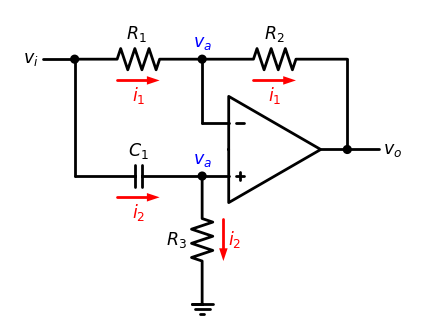

In [4]:
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing() as d:
    d += (op := elm.Opamp(leads = True))
    d += elm.Line().up(d.unit/2).at(op.in1)
    d += elm.Dot().label('$v_a$', color='Blue')
    d.push()
    d += (R2 := elm.Resistor().right().label('$R_2$').tox(op.out))
    d += elm.Line().toy(op.out).dot()
    d += elm.Line().right(d.unit/4).label('$v_o$', loc = 'right')
    d.pop()
    d += (R1 := elm.Resistor().left().label('$R_1$').dot())
    d.push()
    d += elm.Line().left(d.unit/4).label('$v_i$', loc = 'left')
    d.pop()
    d += elm.Line().down().toy(op.in2)
    d += (C1 := elm.Capacitor().right().to(op.in2).label('$C_1$'))
    d += elm.Dot().label('$v_a$', color='Blue')
    d += (R3 := elm.Resistor().down().label('$R_3$'))
    d += elm.Ground(lead = False)

    d += elm.CurrentLabel(top = False, ofst = .5, length = 1).at(R1).label('$i_1$').color('Red')
    d += elm.CurrentLabel(top = False, ofst = .5, length = 1).at(R2).label('$i_1$').color('Red')
    d += elm.CurrentLabel(top = False, ofst = .5, length = 1).at(R3).label('$i_2$').reverse().color('Red')
    d += elm.CurrentLabel(top = False, ofst = .5, length = 1).at(C1).label('$i_2$').color('Red')



## 1. Desarrollo de la transferencia $T(\$)=\frac{V_o}{V_i}$

$\large V_a = V_i · \frac{Z_{R_3}}{Z_{R_3} + Z_{C_1}} = V_i · \frac{R_3}{R_3 + \frac{1}{\$ C_1}} = V_i · \frac{\$ C_1 R_3}{\$ C_1 R_3 + 1} \qquad (1)$ 
<br><br><br>
$\large \frac{V_i - V_a}{R_1} = \frac{V_a - V_o}{R_2} \quad \Longrightarrow \quad V_i · \frac{1}{R_1} - V_a · \left(\frac{1}{R_1} + \frac{1}{R_2}\right) = -V_o · \frac{1}{R_2} \qquad (2)$
<br><br><br>
$\large (1)\text{ en }(2): $
<br><br><br>
$\large V_i · \frac{1}{R_1} - V_i · \frac{\$ C_1 R_3}{\$ C_1 R_3 + 1} · \frac{R_1 + R_2}{R_1 R_2} = - V_o · \frac{1}{R_2}$
<br><br><br>
$\large V_i · \frac{\$ C_1 R_3}{\$ C_1 R_3 + 1} · \frac{R_1 + R_2}{R_1} - V_i · \frac{R_2}{R_1} = V_o $
<br><br><br>
$\large V_i · \left( \frac{(\$ C_1 R_3)(R_1 + R_2) - R_2 (\$ C_1 R_3 + 1)}{R_1 (\$ C_1 R_3 + 1)} \right) = V_o$
<br><br><br>
$\large T(\$) = \frac{V_o}{V_i} = \frac{\$ C_1 R_1 R_3 - R_2}{\$ C_1 R_1 R_3 + R_1} = \frac{\$ - \frac{R_2}{C_1 R_1 R_3}}{\$ + \frac{1}{C_1 R_3}} = \frac{\$ - \frac{R_2}{R_1}\omega_0}{\$ + \omega_0}$

In [5]:
import numpy as np
from scipy import signal as sig
from pytc2.sistemas_lineales import bodePlot, pzmap, GroupDelay, analyze_sys

(6,
 array([<Axes: title={'center': 'Magnitude response'}, ylabel='Magnitude [dB]'>,
        <Axes: title={'center': 'Phase response'}, xlabel='Angular frequency [rad/sec]', ylabel='Phase [rad]'>],
       dtype=object))

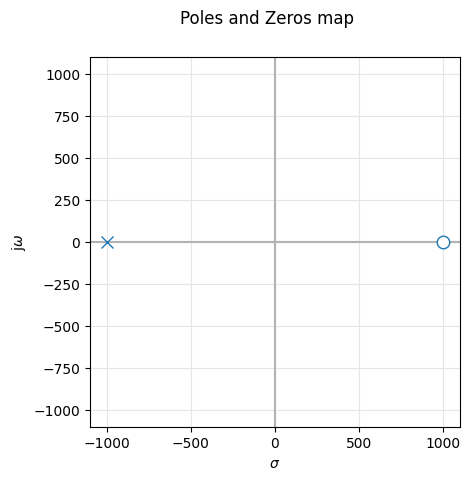

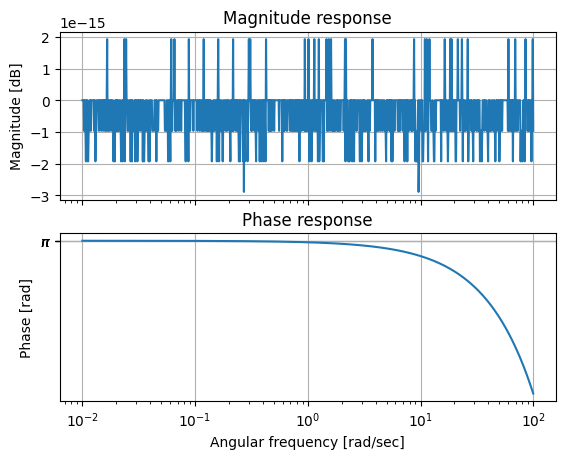

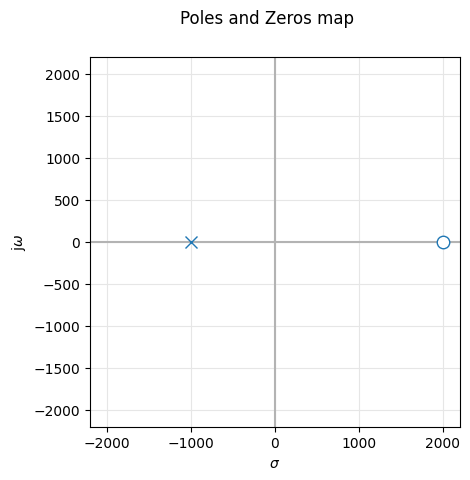

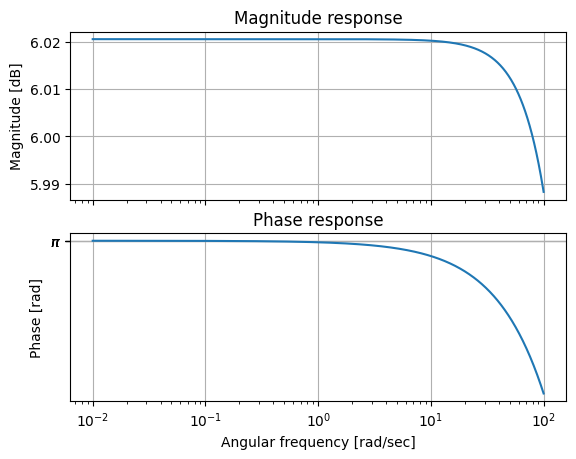

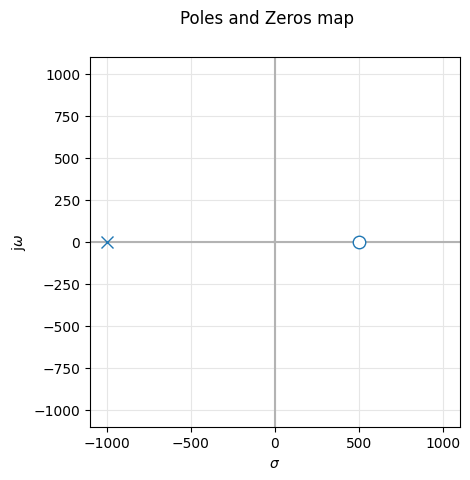

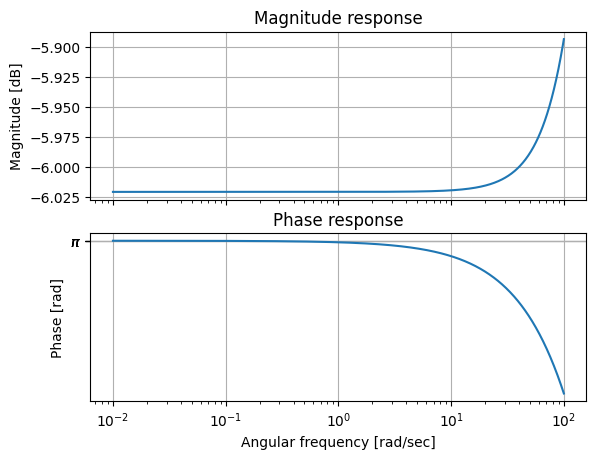

In [13]:
# Valores expresados en la consigna 5

R1 = 1e3
R2 = 1e3
R3 = 1e3
C1 = 1e-6

t_num = [1, (-R2/(R1*R3*C1))]
t_den = [1, 1/(C1*R3)]

t = sig.TransferFunction(t_num, t_den)

pzmap(t)
bodePlot(t)

# R2 > R1

R1 = 1e3
R2 = 2e3

t2_num = [1, (-R2/(R1*R3*C1))]
t2_den = [1, 1/(C1*R3)]

t2 = sig.TransferFunction(t2_num, t2_den)

pzmap(t)
bodePlot(t)

# R1 > R2

R1 = 2e3
R2 = 1e3

t3_num = [1, (-R2/(R1*R3*C1))]
t3_den = [1, 1/(C1*R3)]

t3 = sig.TransferFunction(t3_num, t3_den)

pzmap(t)
bodePlot(t)

## 2. ¿Qué tipo de transferencia es?

Se trata de una transferencia que posee un polo en el semiplano izquierdo y un cero en el semiplano derecho. 
 - Si se igualan los valores de $R_1$ y $R_2$, la distancia de las singularidades al origen es igual, por lo que el módulo de la transferencia se mantiene unitario y el filtro afecta únicamente a la fase (transferencia pasa-todo).
 - Si $R_1 > R_2$ la magnitud del polo domina para bajas frecuencias y la transferencia se convierte en tipo low-shelf.
 - Si $R_1 < R_2$ la magnitud del cero domina para bajas frecuencias y la transferencia se convierte en tipo high-shelf.

## 3. Transferencia normalizada

Para normalizar, elijo $\Omega_\omega = \omega_0 = \frac{1}{C_1 R_3}$ y $\Omega_Z = R_3$ de forma que:
<br> 
$\{R_{1n} = \frac{R_1}{R_3}; \quad R_{2n} = \frac{R_2}{R_3}; \quad R_{3n} = 1; \quad C_{1n} = C_1 \frac{1}{R_3 C_1} R_3 = 1\}$
<br><br>
Tomando $\omega_0 = 1$:
<br>
$\large T_n(\$) = \frac{\$ - \frac{R_2}{R_1}}{\$ + 1}$

(2,
 array([<Axes: title={'center': 'Magnitude response'}, ylabel='Magnitude [dB]'>,
        <Axes: title={'center': 'Phase response'}, xlabel='Angular frequency [rad/sec]', ylabel='Phase [rad]'>],
       dtype=object))

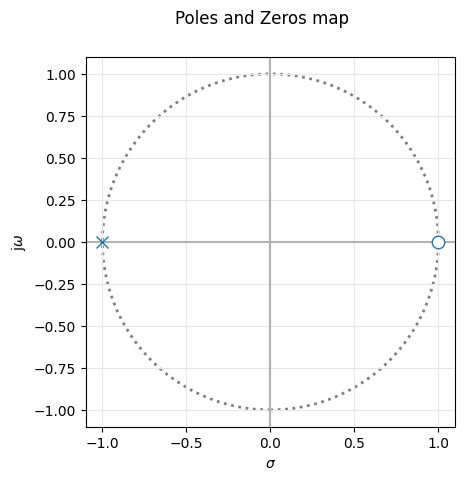

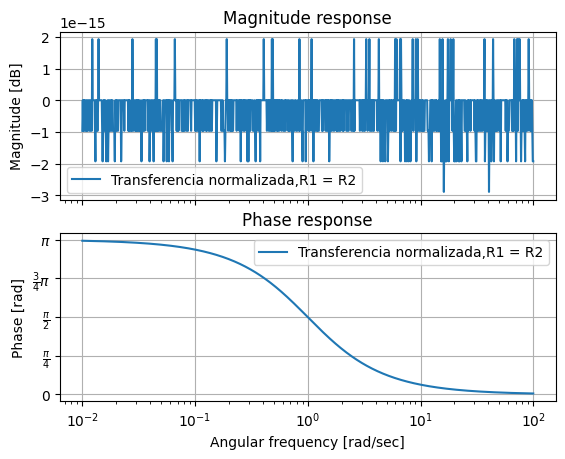

In [17]:
R1 = 1
R2 = 1
R3 = 1

R1n = R1/R3
R2n = R2/R3
R3n = 1
C1n = 1

Tn_num = [1, -R2n/R1n]
Tn_den = [1, 1]

Tn = sig.TransferFunction(Tn_num, Tn_den)

pzmap(Tn)
bodePlot(Tn)